## Basis Expansions Lab: 
$f(X) = \sum_{m=1}^{M} \beta_m h_m (X)$
### Piecewise fitting using conditional basis (with two knots _i.e._, $\varepsilon_{1}$ and $\varepsilon_{2}$)


In [39]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(20221029)

# FYI: you can check package version like this
# Result will be the same as you do through the terminal
print('My numpy version is', np.__version__)

My numpy version is 1.23.3


### Initializing coordinates and regions:

In [40]:
# Axes limits and knots
x_min, x_knot_1, x_knot_2, x_max = -1, 1.5, 4.5, 7

# Points generated from a cosine function with normal noise
x_true = np.linspace(x_min, x_max,50)
y_true = np.cos(x_true)
y_obs  = y_true + np.random.normal(scale=0.5, size=len(x_true))

# Get x-y coordinates per region
x_region_1 = x_true[x_true <= x_knot_1]
x_region_2 = x_true[(x_knot_1 < x_true) & (x_true < x_knot_2)]
x_region_3 = x_true[x_true >= x_knot_2]
y_region_1 = y_true[x_true <= x_knot_1]
y_region_2 = y_true[(x_knot_1 < x_true) & (x_true < x_knot_2)]
y_region_3 = y_true[x_true >= x_knot_2]

### Piecewise constant fitting with the following basis functions:

$h_{1}(X)=I(X<\varepsilon_{1})\\$
$h_{2}(X)=I(\varepsilon_{1}\leq X < \varepsilon_2 )\\$
$h_{3}(X)=I(\varepsilon_{2}\leq X)\\$

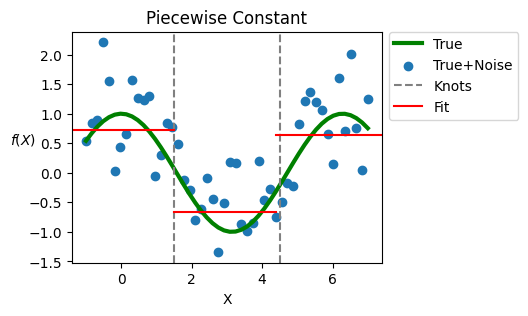

In [41]:
# Plot cosine line and noisy data
plt.figure(figsize=(4, 3))
plt.plot(x_true, y_true, linewidth=3, c='g',  label='True')
plt.scatter(x_true, y_obs, label='True+Noise')

# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--', label='Knots')
plt.axvline(x=x_knot_2, c='gray', ls='--')

# Plot piecewise constant fits
plt.axhline(y=y_region_1.mean(), c='r', xmin=0, xmax=0.33, label='Fit')
plt.axhline(y=y_region_2.mean(), c='r', xmin=0.33, xmax=0.66)
plt.axhline(y=y_region_3.mean(), c='r', xmin=0.66, xmax=1)
plt.title('Piecewise Constant')
plt.legend(bbox_to_anchor=(1, 1.03))
plt.xlabel('X')
plt.ylabel('$f(X)$', rotation=0)
plt.show()

### Piecewise linear fitting with the following basis functions:

$h_{1}(X)=I(X<\varepsilon_{1})\\$
$h_{2}(X)=I(\varepsilon_{1}\leq X < \varepsilon_2 )\\$
$h_{3}(X)=I(\varepsilon_{2}\leq X)\\$
$h_{4}(X)=h_1(X)X\\$
$h_{5}(X)=h_2(X)X\\$
$h_{6}(X)=h_3(X)X\\$

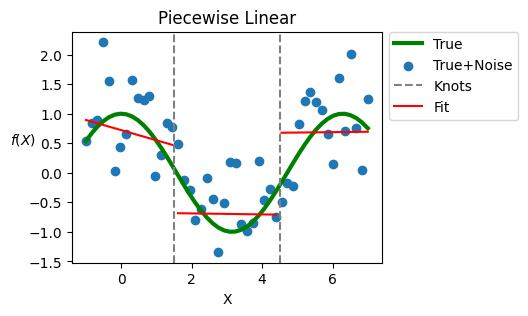

In [45]:
# Calculate OLS coefficients from regression anatomy
beta_region_1 = ((y_region_1 - y_region_1.mean()).dot(x_region_1) / 
                (x_region_1**2).sum())
beta_region_2 = ((y_region_2 - y_region_2.mean()).dot(x_region_2) / 
                (x_region_2**2).sum())
beta_region_3 = ((y_region_3 - y_region_3.mean()).dot(x_region_3) / 
                (x_region_3**2).sum())

# Calculate regression fitted values
y_hat_region_1 = beta_region_1 * x_region_1 + y_region_1.mean()
y_hat_region_2 = beta_region_2 * x_region_2 + y_region_2.mean()
y_hat_region_3 = beta_region_3 * x_region_3 + y_region_3.mean()

# Plot cosine line and noisy data
plt.figure(figsize=(4, 3))
plt.plot(x_true, y_true, linewidth=3, c='g',label='True')
plt.scatter(x_true, y_obs, label='True+Noise')

# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--', label='Knots')
plt.axvline(x=x_knot_2, c='gray', ls='--')

# Plot piecewise linear fits
plt.plot(x_region_1, y_hat_region_1, c='r', label='Fit')
plt.plot(x_region_2, y_hat_region_2, c='r')
plt.plot(x_region_3, y_hat_region_3, c='r')
plt.title('Piecewise Linear')
plt.legend(bbox_to_anchor=(1, 1.03))
plt.xlabel('X')
plt.ylabel('$f(X)$', rotation=0)
plt.show()

### Continuous piecewise linear fitting with the following basis functions:

$h_{1}(X)=1\\$
$h_{2}(X)=X\\$
$h_{3}(X)=(X-\varepsilon_1)_+\\$
$h_{4}(X)=(X-\varepsilon_2)_+\\$

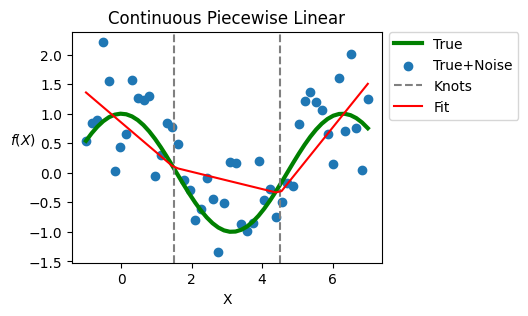

In [43]:
# Construct H
# Continuity is enforced at the knots through incorporating proper constraints into the basis functions
h1 = np.ones_like(x_true)
h2 = np.copy(x_true)
h3 = np.where(x_true < x_knot_1, 0, x_true - x_knot_1)
h4 = np.where(x_true < x_knot_2, 0, x_true - x_knot_2)
H  = np.vstack((h1, h2, h3, h4)).T

# Fit basis expansion via OLS
HH = H.T @ H
beta = np.linalg.solve(HH, H.T @ y_obs)
y_hat = H @ beta

# Plot cosine line and noisy data
plt.figure(figsize=(4, 3))
plt.plot(x_true, y_true, linewidth=3, c='g', label='True')
plt.scatter(x_true, y_obs, label='True+Noise')

# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--', label='Knots')
plt.axvline(x=x_knot_2, c='gray', ls='--')

# Plot piecewise linear fits
plt.plot(x_true, y_hat, c='r', label='Fit')
plt.title('Continuous Piecewise Linear')
plt.legend(bbox_to_anchor=(1, 1.03))
plt.xlabel('X')
plt.ylabel('$f(X)$', rotation=0)
plt.show()

### Continuous piecewise polynomial fitting:
Piecewise polynomials, even those continuous at the knots, tend not to be smooth: they rapidly change the slope at the knots. To prevent this and increase their smoothness, it is enough to increase the order of the local polynomial and require the first two derivatives on both sides of the knot to be the same. A function that is continuous and has continuous first and second derivatives is called a cubic spline and can be represented with the following basis functions:

$h_{1}(X)=1\\$
$h_{2}(X)=X\\$
$h_{3}(X)=X^2\\$
$h_{4}(X)=X^3\\$
$h_{5}(X)=(X-\varepsilon_1)_+^3\\$
$h_{6}(X)=(X-\varepsilon_2)_+^3\\$

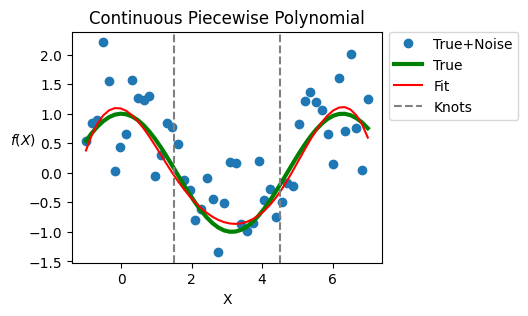

In [44]:
# Construct H
h1 = np.ones_like(x_true) # `ones_like` returns an array of ones with the same shape and type as `x_true`
h2 = np.copy(x_true)
h3 = h2 ** 2
h4 = h2 ** 3
h5 = np.where(x_true < x_knot_1, 0, (x_true - x_knot_1) ** 3)
h6 = np.where(x_true < x_knot_2, 0, (x_true - x_knot_2) ** 3)
H  = np.vstack((h1, h2, h3, h4, h5, h6)).T

# Fit basis expansion via OLS
HH = H.T @ H
beta = np.linalg.solve(HH, H.T @ y_true)
y_hat = H @ beta

# Plot simulated data and cubic spline
plt.figure(figsize=(4, 3))
plt.plot(x_true, y_obs, 'o', label='True+Noise')
plt.plot(x_true, y_true, linewidth=3, color='g', label='True')
plt.plot(x_true, y_hat, color='r', label='Fit')
plt.title('Continuous Piecewise Polynomial')

# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--', label='Knots')
plt.axvline(x=x_knot_2, c='gray', ls='--')
plt.legend(bbox_to_anchor=(1, 1.03))             
plt.xlabel('X')
plt.ylabel('$f(X)$', rotation=0)
plt.show()